# Model Analysis Elastic Net
## Comparing different Parameters
using the data with only the significant features

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
df = pd.read_csv('data_signif.csv').drop('Unnamed: 0', axis=1)

### Features/Labels split

In [5]:
# Lables
y = df['target_return']

# Features
X = df.drop(['target_return'], axis=1)

### Rescaling features

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_scaled = scaler.fit_transform(X)

In [9]:
X_standardize = pd.DataFrame(X_scaled,columns=X.columns)
X_standardize.head()

,exp_market_change,rates,Debt_M,Debt_Per_Capita,CPI_perc,GDP_Mill_dollars,GDP_Growth_perc,Unemployment_alt
0,-0.752487,1.614377,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
1,0.497042,0.922660,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
2,-0.240694,0.701310,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
3,2.370180,-0.363935,-2.320115,-1.896766,0.001992,0.377860,1.004574,-0.913907
4,1.155783,-0.529947,0.357897,0.850759,-1.699192,1.431649,1.319792,-0.913907


### Train/Test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_standardize, y, test_size=0.3, random_state=101)

### Training

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [13]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.001)
enet = ElasticNet(alpha=0.001,l1_ratio=0.6)
enet_l1 = ElasticNet(alpha=0.001,l1_ratio=0.8)
enet_a = ElasticNet(alpha=0.01,l1_ratio=0.6)

In [15]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
enet_l1.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.8,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
enet_a.fit(X_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.6,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
pd.DataFrame(np.array([lm.intercept_, ridge.intercept_, lasso.intercept_,enet.intercept_,enet_l1.intercept_,enet_a.intercept_]),
             columns=['Intercept'], 
             index=['Linear', 'Ridge', 'Lasso','ElasticNet L1=0.6 a=0.001','ElasticNet L1=0.8 a=0.001','ElasticNet L1=0.6 a=0.01'])

,Intercept
Linear,0.028542
Ridge,0.025024
Lasso,0.025226
ElasticNet L1=0.6 a=0.001,0.025143
ElasticNet L1=0.8 a=0.001,0.025187
ElasticNet L1=0.6 a=0.01,0.026189


In [22]:
# Create dataframe for coefficents of linear model
lm_coef = pd.DataFrame(lm.coef_,index=X.columns,columns=['Linear'])

# Create dataframe for coefficents of ridge model
ridge_coef = pd.DataFrame(ridge.coef_,index=X.columns,columns=['Ridge'])

# Create dataframe for coefficents of lasso model
lasso_coef = pd.DataFrame(lasso.coef_,index=X.columns,columns=['Lasso'])

# Create dataframe for coefficents of ElasticNet model
enet_coef = pd.DataFrame(enet.coef_,index=X.columns,columns=['ElasticNet L1=0.6 a=0.001'])

# Create dataframe for coefficents of ElasticNet model
enet_l1_coef = pd.DataFrame(enet_l1.coef_,index=X.columns,columns=['ElasticNet L1=0.8 a=0.001'])

# Create dataframe for coefficents of ElasticNet model
enet_a_coef = pd.DataFrame(enet_a.coef_,index=X.columns,columns=['ElasticNet L1=0.6 a=0.01'])

# Put dataframes together
pd.concat([lm_coef, ridge_coef, lasso_coef,enet_coef,enet_l1_coef,enet_a_coef], axis=1)

,Linear,Ridge,Lasso,ElasticNet L1=0.6 a=0.001,ElasticNet L1=0.8 a=0.001,ElasticNet L1=0.6 a=0.01
exp_market_change,-0.032147,-0.026801,-0.024900,-0.026058,-0.025452,-0.010744
rates,-0.110166,-0.048012,-0.036083,-0.039457,-0.037173,-0.008859
Debt_M,3.072819,0.008018,-0.017712,-0.001837,-0.018052,-0.000000
Debt_Per_Capita,-3.457955,-0.043383,-0.000000,-0.020268,-0.000440,-0.000000
CPI_perc,0.096454,0.021529,0.024228,0.025176,0.024662,0.013209
GDP_Mill_dollars,1.106572,0.034258,0.000000,0.006834,0.000000,0.004746
GDP_Growth_perc,0.302552,-0.027855,-0.000000,-0.000000,-0.000000,0.000000
Unemployment_alt,0.044277,-0.008027,-0.003316,-0.003140,-0.003204,-0.005762


### Testing

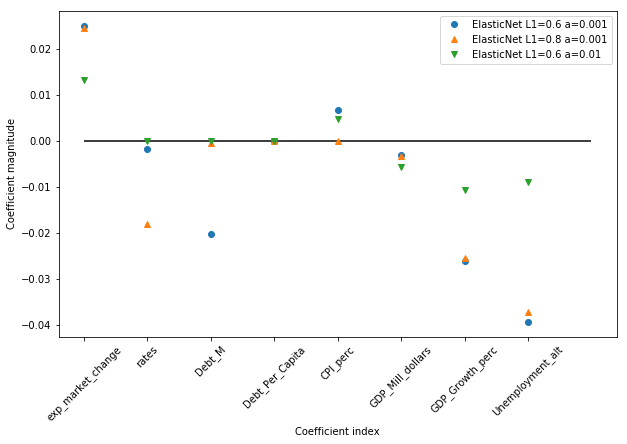

In [53]:
plt.figure(figsize=(10,6))
plt.plot(enet_coef, 'o', label="ElasticNet L1=0.6 a=0.001")
plt.plot(enet_l1_coef, '^', label="ElasticNet L1=0.8 a=0.001")
plt.plot(enet_a_coef, 'v', label="ElasticNet L1=0.6 a=0.01")
plt.xticks(range(enet_coef.shape[0]), enet_coef.index, rotation=45)
plt.hlines(0, 0, enet_coef.shape[0])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()


In [24]:
from sklearn import metrics

In [25]:
# Get predictions for training data
fit_lm = lm.predict(X_train)
fit_ridge = ridge.predict(X_train)
fit_lasso = lasso.predict(X_train)
fit_enet = enet.predict(X_train)
fit_enet_l1 = enet_l1.predict(X_train)
fit_enet_a = enet_a.predict(X_train)

# Print MSE for models
print('MSE (train)')
print('Linear:                    ', metrics.mean_squared_error(y_train, fit_lm))
print('Ridge:                     ', metrics.mean_squared_error(y_train, fit_ridge))
print('Lasso:                     ', metrics.mean_squared_error(y_train, fit_lasso))
print('ElasticNet L1=0.6 a=0.001: ', metrics.mean_squared_error(y_train, fit_enet))
print('ElasticNet L1=0.8 a=0.001: ', metrics.mean_squared_error(y_train, fit_enet_l1))
print('ElasticNet L1=0.6 a=0.01:  ', metrics.mean_squared_error(y_train, fit_enet_a))


MSE (train)
Linear:                     0.014150426324373088
Ridge:                      0.014958965337058134
Lasso:                      0.015038609880689849
ElasticNet L1=0.6 a=0.001:  0.015015506579880027
ElasticNet L1=0.8 a=0.001:  0.015033705749464072
ElasticNet L1=0.6 a=0.01:   0.015471620503386066


In [26]:
print('MSE (train)')
print('Linear:                     ', lm.score(X_train, y_train))
print('Ridge:                      ', ridge.score(X_train, y_train))
print('Lasso:                      ', lasso.score(X_train, y_train))
print('ElasticNet: L1=0.6 a=0.001: ', enet.score(X_train, y_train))
print('ElasticNet: L1=0.8 a=0.001: ', enet_l1.score(X_train, y_train))
print('ElasticNet: L1=0.6 a=0.01:  ', enet_a.score(X_train, y_train))

MSE (train)
Linear:                      0.12971196763389758
Ridge:                       0.07998471487764014
Lasso:                       0.07508636824291348
ElasticNet: L1=0.6 a=0.001:  0.07650728134772278
ElasticNet: L1=0.8 a=0.001:  0.07538798507177147
ElasticNet: L1=0.6 a=0.01:   0.04845508843681845


In [27]:
def adj_r2_score(model,y,yhat):
    adj = 1 - (1 - metrics.r2_score(y,yhat)) * float(len(y)-1) / (len(y)-len(model.coef_)-1)
    return adj

In [28]:
print('Adjusted R-SQUARED SCORES')
print('Linear:                        ', adj_r2_score(lm, y_train, lm.predict(X_train)))
print('Ridge:                         ', adj_r2_score(ridge, y_train, ridge.predict(X_train)))
print('Lasso:                         ', adj_r2_score(lasso, y_train, lasso.predict(X_train)))
print('ElasticNet:  L1=0.6 a=0.001:   ', adj_r2_score(enet, y_train, enet.predict(X_train)))
print('ElasticNet:  L1=0.8 a=0.001:   ', adj_r2_score(enet_l1, y_train, enet_l1.predict(X_train)))
print('ElasticNet:  L1=0.6 a=0.01:    ', adj_r2_score(enet_a, y_train, enet_a.predict(X_train)))

Adjusted R-SQUARED SCORES
Linear:                         0.10117793378582873
Ridge:                          0.049820279299857884
Lasso:                          0.044761331136123794
ElasticNet:  L1=0.6 a=0.001:    0.046228831555844785
ElasticNet:  L1=0.8 a=0.001:    0.0450728370413378
ElasticNet:  L1=0.6 a=0.01:     0.017256894615074847


---
### Predicting

In [29]:
pred_lm = lm.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)
pred_enet = enet.predict(X_test)
pred_enet_l1 = enet_l1.predict(X_test)
pred_enet_a = enet_a.predict(X_test)

### Testing

Firstly we plot the actual returns vs. the predictions by our models.

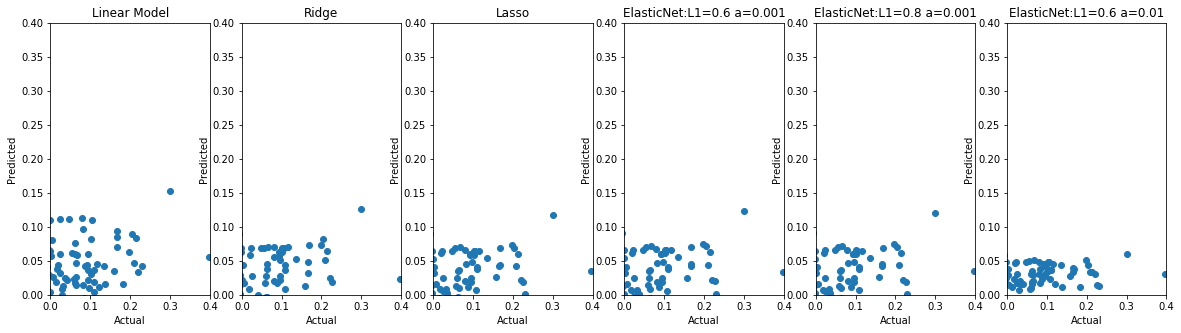

In [30]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=6)

# Create list of titles and predictions to use in for loop
pred = [pred_lm, pred_ridge, pred_lasso, pred_enet, pred_enet_l1, pred_enet_a]
title = ['Linear Model', 'Ridge', 'Lasso', 'ElasticNet:L1=0.6 a=0.001', 'ElasticNet:L1=0.8 a=0.001', 'ElasticNet:L1=0.6 a=0.01']

# Loop through all axes to plot each model's results 
for i in range(6):
    ax[i].set_title(title[i])
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].set_xlim(0, 0.4)
    ax[i].set_ylim(0, 0.4)
    ax[i].scatter(y_test,pred[i]) 

Secondly we calculate the MSE for each model on our testing set. 

In [54]:
print('MSE:')
print('Linear:                        ', metrics.mean_squared_error(y_test, pred_lm))
print('Ridge:                         ', metrics.mean_squared_error(y_test, pred_ridge))
print('Lasso:                         ', metrics.mean_squared_error(y_test, pred_lasso))
print('ElasticNet:  L1=0.6 a=0.001:   ', metrics.mean_squared_error(y_test, pred_enet))
print('ElasticNet:  L1=0.8 a=0.001:   ', metrics.mean_squared_error(y_test, pred_enet))
print('ElasticNet:  L1=0.6 a=0.01:    ', metrics.mean_squared_error(y_test, pred_enet))

MSE:
Linear:                         0.013642763896953482
Ridge:                          0.013745006688510317
Lasso:                          0.013647294790990708
ElasticNet:  L1=0.6 a=0.001:    0.013610747391380462
ElasticNet:  L1=0.8 a=0.001:    0.013610747391380462
ElasticNet:  L1=0.6 a=0.01:     0.013610747391380462


In [32]:
print('Adjusted R-SQUARED SCORES')
print('Linear:                        ', adj_r2_score(lm, y_test, lm.predict(X_test)))
print('Ridge:                         ', adj_r2_score(ridge, y_test, ridge.predict(X_test)))
print('Lasso:                         ', adj_r2_score(lasso, y_test, lasso.predict(X_test)))
print('ElasticNet:  L1=0.6 a=0.001:   ', adj_r2_score(enet, y_test, enet.predict(X_test)))
print('ElasticNet:  L1=0.8 a=0.001:   ', metrics.mean_squared_error(y_test, pred_enet))
print('ElasticNet:  L1=0.6 a=0.01:    ', metrics.mean_squared_error(y_test, pred_enet))

Adjusted R-SQUARED SCORES
Linear:                         0.056709941424155974
Ridge:                          0.04964065476310464
Lasso:                          0.05639666565877155
ElasticNet:  L1=0.6 a=0.001:    0.05892363152723756
ElasticNet:  L1=0.8 a=0.001:    0.013610747391380462
ElasticNet:  L1=0.6 a=0.01:     0.013610747391380462
